# Introduction to `geoplanar`

Welcome to `geoplanar`, a package for [planar enforcement](https://ibis.geog.ubc.ca/courses/klink/gis.notes/ncgia/u12.html#SEC12.6) for polygon (multipolygon) [GeoSeries/GeoDataFrames](https://github.com/geopandas/geopandas).
In this notebook, we will demonstrate some of the basic functionality of `geoplanar` using the example of a researcher interested in integrating data from the United States and Mexico, to study the US-Mexico international border region.


In [54]:
import geoplanar
import geopandas
import pandas
import libpysal

<Axes: >

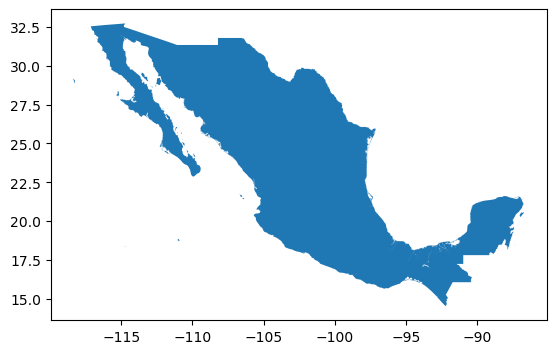

In [55]:
mexico = geopandas.read_file("../datasets/mexico/lvl0/mex_admbnda_adm0_govmex_20210618.shp")
mexico.plot()

In [48]:
us = libpysal.examples.load_example('us_income')

In [49]:
us.get_file_list()

['/Users/martin/miniforge3/envs/geoplanar/lib/python3.12/site-packages/libpysal/examples/us_income/spi_download.csv',
 '/Users/martin/miniforge3/envs/geoplanar/lib/python3.12/site-packages/libpysal/examples/us_income/usjoin.csv',
 '/Users/martin/miniforge3/envs/geoplanar/lib/python3.12/site-packages/libpysal/examples/us_income/states48.gal',
 '/Users/martin/miniforge3/envs/geoplanar/lib/python3.12/site-packages/libpysal/examples/us_income/README.md',
 '/Users/martin/miniforge3/envs/geoplanar/lib/python3.12/site-packages/libpysal/examples/us_income/us48.shx',
 '/Users/martin/miniforge3/envs/geoplanar/lib/python3.12/site-packages/libpysal/examples/us_income/us48.shp',
 '/Users/martin/miniforge3/envs/geoplanar/lib/python3.12/site-packages/libpysal/examples/us_income/us48.dbf']

In [50]:
us = geopandas.read_file(us.get_path("us48.shp")).set_crs(mexico.crs)

<Axes: >

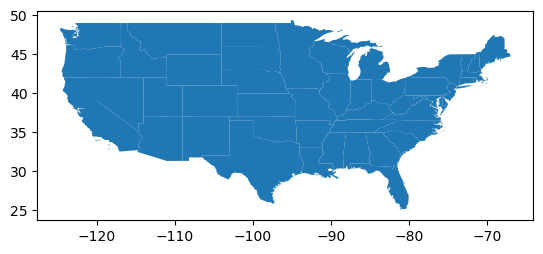

In [10]:
us.plot()

In [13]:
usmex = pandas.concat([us, mexico])

/Users/martin/miniforge3/envs/geoplanar/lib/python3.12/site-packages/geopandas/array.py:1459: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


<Axes: >

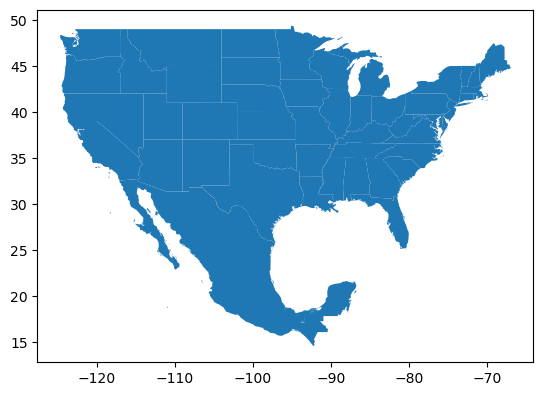

In [14]:
usmex.plot()

In [15]:
usmex.head()

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,Shape_Leng,Shape_Area,ADM0_ES,ADM0_PCODE,ADM0_REF,ADM0ALT1ES,ADM0ALT2ES,date,validOn,validTo
0,20.750,34.956,1.0,1.0,Washington,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45.132,34.527,2.0,2.0,Montana,30,Mtn,MT,"POLYGON ((-111.47463 44.70224, -111.48001 44.6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.571,18.899,3.0,3.0,Maine,23,N Eng,ME,"MULTIPOLYGON (((-69.77779 44.07407, -69.86044 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.874,21.353,4.0,4.0,North Dakota,38,W N Cen,ND,"POLYGON ((-98.73006 45.93830, -99.00645 45.939...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22.598,22.746,5.0,5.0,South Dakota,46,W N Cen,SD,"POLYGON ((-102.78793 42.99532, -103.00541 42.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
usmex.shape

(49, 19)

In [17]:
usmex.tail()

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,Shape_Leng,Shape_Area,ADM0_ES,ADM0_PCODE,ADM0_REF,ADM0ALT1ES,ADM0ALT2ES,date,validOn,validTo
44,13.517,20.877,46.0,46.0,Arkansas,05,W S Cen,AR,"POLYGON ((-94.46148 34.19666, -94.45241 34.508...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,11.225,32.570,47.0,47.0,Louisiana,22,W S Cen,LA,"MULTIPOLYGON (((-93.70736 30.23937, -93.69921 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,13.348,41.085,48.0,48.0,Florida,12,S Atl,FL,"MULTIPOLYGON (((-80.78589 28.78493, -80.76264 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,16.928,40.823,51.0,51.0,Michigan,26,E N Cen,MI,"MULTIPOLYGON (((-88.49746 48.17392, -88.62525 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-92.77034 15.15128, -92.77107 ...",354.605876,173.513956,México,MX,Mexico,None,None,2020-06-23,2021-06-18,None


We have appended the Mexico gdf to the US gdf. For now, however, we are going to zoom in on a subset of the border region to investigate things further:

In [18]:
from shapely.geometry import box

clipper = geopandas.GeoDataFrame(geometry =[box(-109, 25, -97, 33)])


In [19]:
usborder = geopandas.clip(clipper, us)
mexborder = geopandas.clip(clipper, mexico)

/var/folders/2f/fhks6w_d0k556plcv3rfmshw0000gn/T/ipykernel_16076/787162466.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  mexborder = geopandas.clip(clipper, mexico)


<Axes: >

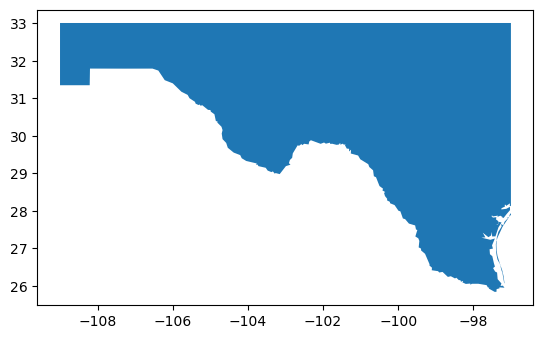

In [20]:
usborder.plot()

<Axes: >

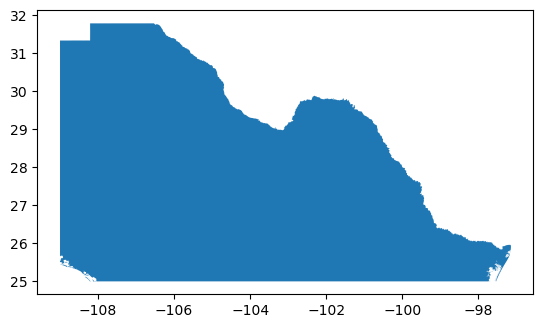

In [21]:
mexborder.plot()

In [22]:
usmex = pandas.concat([usborder, mexborder], ignore_index=True)

<Axes: >

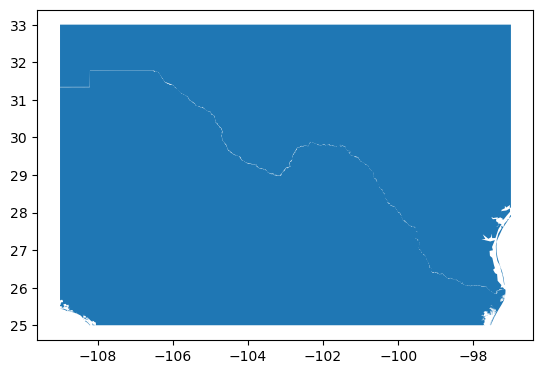

In [25]:
usmex.plot()

## Border discrepancies

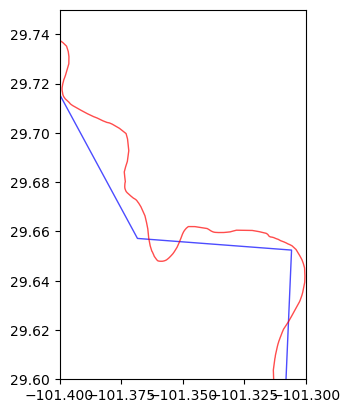

In [26]:
base = usborder.plot(alpha=0.7, facecolor='none', edgecolor='blue')
_ = mexborder.plot(alpha=0.7, facecolor='none', edgecolor='red', ax=base)
_ = base.set_xlim(-101.4, -101.3)
_ = base.set_ylim(29.6, 29.75)


Here we see an example of the kinds of problems that can occur when combining different geospatial datasets that have been constructed by different researchers. In this figure, a portion of the US-Mexico border is displayed, with the blue linestring indicating the border according to the US dataset, while the red linestring is the border according to the Mexican dataset.

There are two types of problems this induces. Consider a point that is situated to the south of the Mexican border but North of the US border. This can only occur when the Mexican linestring is north of the US linestring. Since under planar enforcement, a point can belong to at most a single polygon, this situation would be a violation - not to mention the kind of cartographic error that can lead to a [border war](https://www.npr.org/2012/11/28/166079782/all-over-the-map-cartography-and-conflict).

A second error occurs when a point is north of the Mexican linestring, but south of the US linestring. In this case, the point is not contained by either the US or Mexico polygons. Here the point is within a *gap* polygon.



## Fixing Overlaps/Overshoots

In [27]:
usmex = pandas.concat([usborder, mexborder], ignore_index=True)
usmex['COUNTRY'] = ["US", "MEXICO"]

usmex.area

0    42.837167
1    51.649657
dtype: float64

In [28]:
border_overlaps_removed = geoplanar.trim_overlaps(usmex)
border_overlaps_removed.area # mexico gets trimmed

0    42.837167
1    51.608919
dtype: float64

In [29]:
border_overlaps_removed_1 = geoplanar.trim_overlaps(usmex, largest=False)
border_overlaps_removed_1.area # us gets trimmed

0    42.796428
1    51.649657
dtype: float64

## Fixing undershoots/holes

Trimming the overlaps removes the areas where points belong to both national polygons. What remains after this correction are gaps (empty sliver polygons) where points belong to neither national polygon.

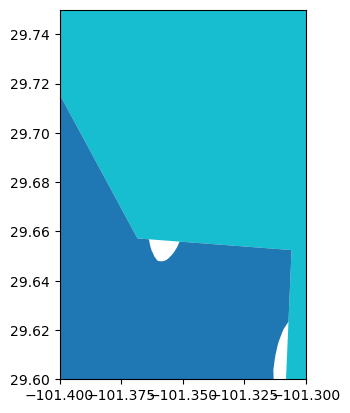

In [31]:
base = border_overlaps_removed.plot(column='COUNTRY')
_ = base.set_xlim(-101.4, -101.3)
_ = base.set_ylim(29.6, 29.75)


In [32]:
gap_gdf = geoplanar.gaps(border_overlaps_removed)

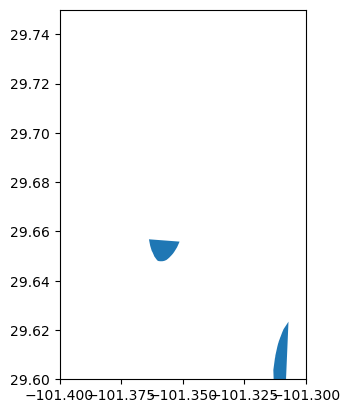

In [33]:
base = gap_gdf.plot()
_ = base.set_xlim(-101.4, -101.3)
_ = base.set_ylim(29.6, 29.75)


In [34]:
gap_gdf.shape

(231, 1)

For the entire border region there are 231 gaps that exist. These can be corrected, by merging each gap with the larger neighboring national polygon:

In [35]:
final = geoplanar.fill_gaps(border_overlaps_removed)

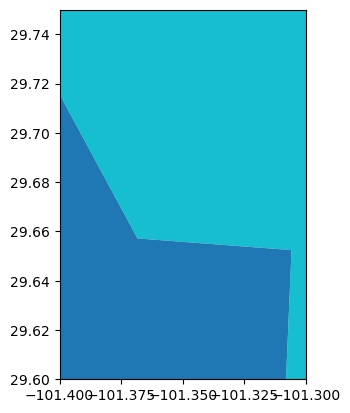

In [36]:
base = final.plot(column='COUNTRY')
_ = base.set_xlim(-101.4, -101.3)
_ = base.set_ylim(29.6, 29.75)


In [37]:
h1 = geoplanar.gaps(final)

In [38]:
h1.shape

(0, 1)

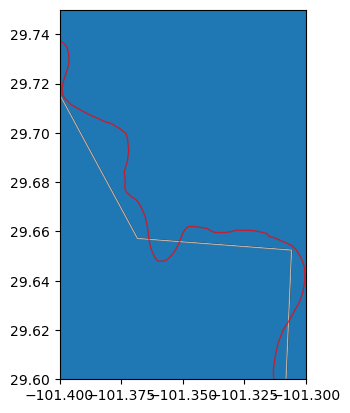

In [39]:
base = final.plot(edgecolor='k')
_ = usborder.plot(alpha=0.7, facecolor='none', edgecolor='white', ax = base)
_ = mexborder.plot(alpha=0.7, facecolor='none', edgecolor='red', ax=base)
_ = base.set_xlim(-101.4, -101.3)
_ = base.set_ylim(29.6, 29.75)



In [40]:
final.area

0    42.837167
1    51.686067
dtype: float64

## Changing the defaults

In [41]:
usmex = pandas.concat([usborder, mexborder], ignore_index=True)
usmex['COUNTRY'] = ["US", "MEXICO"]

usmex.area

0    42.837167
1    51.649657
dtype: float64

In [42]:
border_overlaps_removed_mx = geoplanar.trim_overlaps(usmex, largest=False)


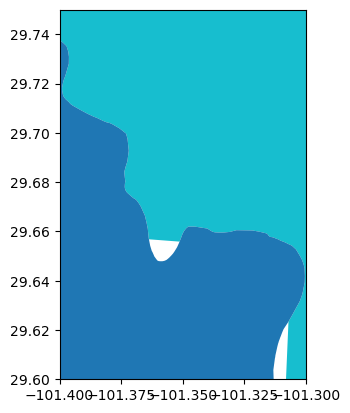

In [43]:
base = border_overlaps_removed_mx.plot(column='COUNTRY')
_ = base.set_xlim(-101.4, -101.3)
_ = base.set_ylim(29.6, 29.75)


In [44]:
final_mx = geoplanar.fill_gaps(border_overlaps_removed_mx, largest=False)

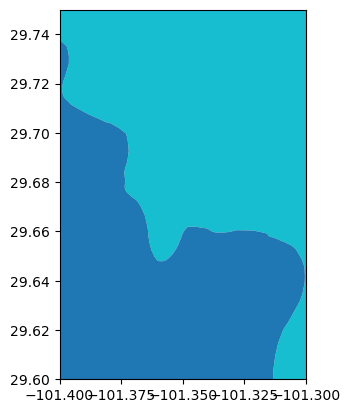

In [45]:
base = final_mx.plot(column='COUNTRY')
_ = base.set_xlim(-101.4, -101.3)
_ = base.set_ylim(29.6, 29.75)
